# Project - Crude Suicide Rates

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd

In [2]:
filename = './crudeSuicideRates.csv'
df = pd.read_csv(filename)
display(df.head(3))

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0


In [3]:
df = pd.DataFrame(df, columns=['Location','First Tooltip','Dim1', 'Period'])

### 1. Find total number of suicide rates for each country.

In [4]:
locations = df.Location.unique()

data = []

def select_loc (loc = locations):
    select_location = df.loc[df['Location'] == loc]
    #print(select_location)
    sum_loc = select_location['First Tooltip'].sum(axis=0)
    data.append(sum_loc)
    return sum_loc

In [5]:
print(len(data))

0


In [6]:
for loc in locations:
    all_loc = select_loc(loc)
    #print(all_loc)

### 2. Matching the total number of Suicice Rate to each country

In [7]:
all_locations = []
for loc in locations:
    if loc not in all_locations:
        all_locations.append(loc)

In [8]:
print(len(all_locations))

184


In [9]:
d1 = {'Location':  all_locations, 'TotalRate': data}
df1 = pd.DataFrame (d1, columns = ['Location','TotalRate'])

sort_d = df1.sort_values(by=['TotalRate'], inplace=True)

In [10]:
print(df1)

                 Location  TotalRate
4     Antigua and Barbuda       13.0
66                Grenada       19.8
160  Syrian Arab Republic       20.1
10                Bahamas       24.1
155                 Sudan       24.1
..                    ...        ...
171               Ukraine      377.8
85             Kazakhstan      399.5
14                Belarus      473.0
96              Lithuania      517.5
135    Russian Federation      546.7

[184 rows x 2 columns]


### 3. Listing the top 10 countries that have the highest/lowest rate

### Least 10 Countries

In [11]:
least10_tot = df1.TotalRate[:10]
least10_loc = df1.Location[:10]

#print(least10_tot, least10_loc)

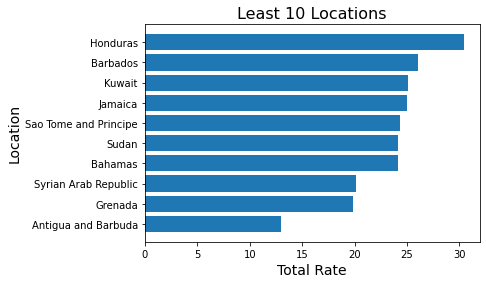

In [12]:
plt.barh(least10_loc, least10_tot);

plt.title('Least 10 Locations', fontsize=16)
plt.ylabel('Location', fontsize=14)
plt.xlabel('Total Rate', fontsize=14);

Figure above shows Antigua and Barbuda has the least Total Suicide Rate of 13 per 100 000 population

### Top 10 locations

In [13]:
top10_tot = df1.TotalRate.tail(10)
top10_loc = df1.Location.tail(10)

#print(top10_tot,top10_loc)

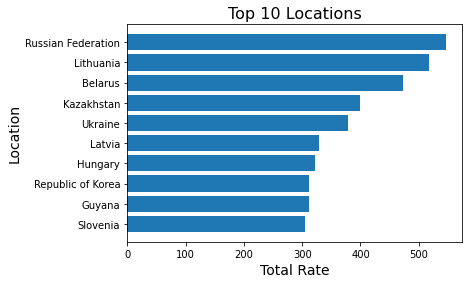

In [14]:
plt.barh(top10_loc, top10_tot);

plt.title('Top 10 Locations', fontsize=16)
plt.ylabel('Location', fontsize=14)
plt.xlabel('Total Rate', fontsize=14);

Figure above shows Russian Federation has the highest Total Suicide Rate of 546.7 per 100 000 population

### 4. Finding the Average 
* Avg = (Total Rate/3) because theres 3 groups(Both sexes, Female, Male)

### least 10 locations

In [15]:
least10_avgrate = least10_tot/3

#print(least10_avgrate, least10_loc)

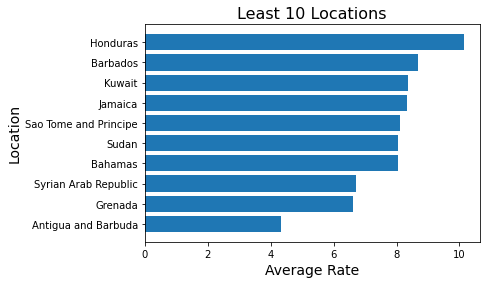

In [16]:
plt.barh(least10_loc, least10_avgrate);

plt.title('Least 10 Locations', fontsize=16)
plt.ylabel('Location', fontsize=14)
plt.xlabel('Average Rate', fontsize=14);

Figure above shows Antigua and Barbuda has the least Average Suicide Rate of 4.33

### top 10 locations

In [17]:
top10_avgrate = top10_tot/3

#print(top10_avgrate, top10_loc)

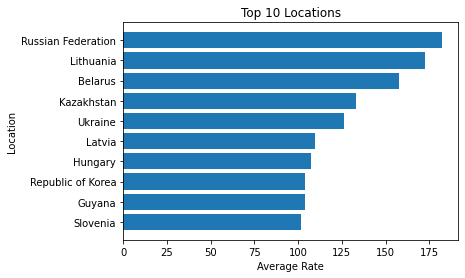

In [18]:
plt.barh(top10_loc, top10_avgrate);

plt.title('Top 10 Locations')
plt.ylabel('Location')
plt.xlabel('Average Rate');

Figure above shows Russian Federation has the highest Average Suicide Rate of 182.23

### 5. Separating the groups (Male, Female, Both Sex)

In [19]:
gender = df.Dim1.unique()
#print(gender)

In [20]:
df.groupby('Dim1')['First Tooltip'].sum()

Dim1
Both sexes     7396.8
Female         3902.3
Male          11017.5
Name: First Tooltip, dtype: float64

In [21]:
sum_gen = df.groupby(["Location", "Dim1"])['First Tooltip'].sum()
#print(sum_gen)

* Adding the values together according to gender and location

In [22]:
bs = []
m = []
f = []

for gen in gender:
    for loc in locations:
        if gen == 'Both sexes':
            bs.append(sum_gen[loc, 'Both sexes'])
        if gen == 'Male':
            m.append(sum_gen[loc, 'Male'])
        if gen == 'Female':
            f.append(sum_gen[loc, 'Female'])
    

* creating DataFrame for each gender and combine into one table

In [23]:
both = {'Location':  all_locations, 'TotalRate': bs, 'Gender': 'Both sexes'}
df_both = pd.DataFrame (both, columns = ['Location','TotalRate', 'Gender'])

female = {'Location':  all_locations, 'TotalRate': f, 'Gender': 'Female'}
df_female = pd.DataFrame (female, columns = ['Location','TotalRate', 'Gender'])

male = {'Location':  all_locations, 'TotalRate': m, 'Gender': 'Male'}
df_male = pd.DataFrame (male, columns = ['Location','TotalRate', 'Gender'])

all_ = pd.concat([df_both, df_female, df_male], axis=0)
sort_all_ = all_.sort_values(by=['Location'], inplace=True)

display(all_.head(3))

,Location,TotalRate,Gender
0,Afghanistan,21.9,Both sexes
0,Afghanistan,5.4,Female
0,Afghanistan,37.2,Male


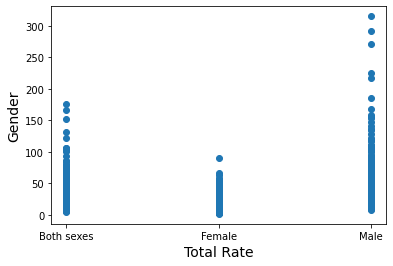

In [33]:
plt.scatter(data=all_, y='TotalRate', x='Gender');
plt.title('', fontsize=16)
plt.ylabel('Gender', fontsize=14)
plt.xlabel('Total Rate', fontsize=14);

Figure above shows Male has the highest Suicide Rate and Female have the lowest Suicide Rate

### 6. Separating the groups (Period: 2000, 2005, 2010, 2015, 2016)

* Adding values according to respective year and genders

In [25]:
sum_yr = df.groupby(["Period", "Dim1"])['First Tooltip'].sum()
#print(sum_yr)

In [26]:
#type(sum_yr)
#sum_yr.index

* creating the table

In [27]:
df_yrgen = sum_yr.add_suffix('').reset_index().sort_values('Dim1')
#display(df_yrgen)

* arranging according to respective gender

In [28]:
df_yrboth = df_yrgen[:5]
df_yrfemale = df_yrgen[5:10]
df_yrmale = df_yrgen[10:15]
#display(df_yrboth)

In [29]:
year = [2000,2005,2010,2015,2016]
print(year)

[2000, 2005, 2010, 2015, 2016]


* Plotting the graph

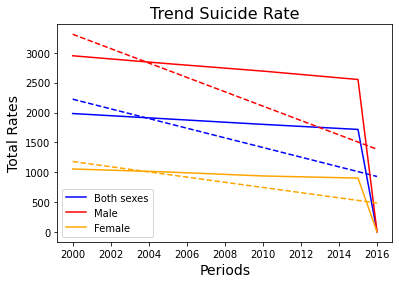

In [37]:
x = np.array(year)

#Both sexes
y = np.array(df_yrboth['First Tooltip'])

plt.plot(x,y, color='blue', label='Both sexes')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color='blue') #drawing the trend


#Male
y = np.array(df_yrmale['First Tooltip'])

plt.plot(x,y, color='red', label='Male')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color='red')


#Female
y = np.array(df_yrfemale['First Tooltip'])

plt.plot(x,y, color='orange', label='Female')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color='orange')

plt.title("Trend Suicide Rate", fontsize=16)
plt.xlabel('Periods', fontsize=14)
plt.ylabel('Total Rates', fontsize=14)
plt.legend()
plt.show();

Figure above shows the trend decreases over the year from 2000 to 2016, with a steep decrease from 2015 to 2016 (Possible due to not enough data collected in 2016)

In [31]:
df_yr = sum_yr.add_suffix('').reset_index().sort_values('Period')
display(df_yr.tail(3))

,Period,Dim1,First Tooltip
12,2016,Both sexes,2.3
13,2016,Female,1.6
14,2016,Male,3.4


In [ ]:
!jupyter nbconvert CrudeSuicideRate.ipynb --to slides --post serve